# **1 Handwritten Digit Recognition (MNIST)**

This project demonstrates classification of handwritten digits (0–9) using the MNIST dataset. Each image is a 28x28 grayscale digit. We will go through data preprocessing, model building, and evaluation to train a classifier that can accurately recognize digits from handwritten images.

In [ ]:
#importing necessary libaries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### **1.1 Dataset Overview**

Let's load the data and check its basic structure

In [ ]:
# Load MNIST dataset into training and test sets (images and labels).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Create a data directory and save MNIST arrays in compressed formatfrom pathlib import Path
data_dir = Path.cwd().parent / "data"
data_dir.mkdir(parents=True, exist_ok=True)   

np.savez_compressed(
    data_dir / "mnist_data.npz",
    x_train=x_train, y_train=y_train,
    x_test=x_test, y_test=y_test
)

In [ ]:
# Load MNIST data arrays from the compressed file
data_path = Path.cwd().parent / "data" / "mnist_data.npz"
data = np.load(data_path)
x_train, y_train = data["x_train"], data["y_train"]
x_test, y_test = data["x_test"], data["y_test"]

In [ ]:
# Display shapes of train/test sets and first 10 training labels
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)
print("First 10 labels:", y_train[:10])


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
First 10 labels: [5 0 4 1 9 2 1 3 1 4]


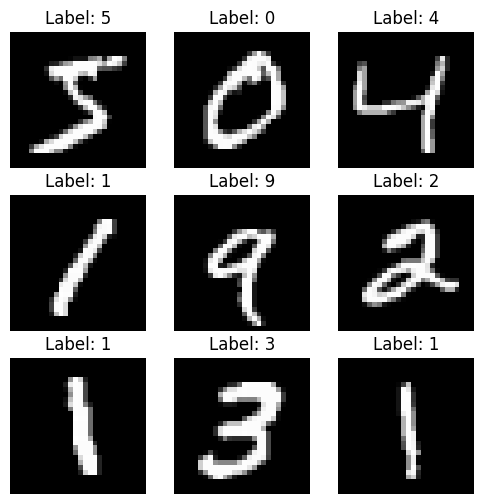

In [ ]:
# Visualize the first 9 images in the training set with their labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()


### **1.2 Data Preprocessing: Normalization and Reshaping**

In [ ]:
# Normalize pixel values to [0,1] and show range after scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Pixel value range after normalization:", x_train.min(), "to", x_train.max())


Pixel value range after normalization: 0.0 to 1.0


In [ ]:
# Reshape images from 28x28 to 1D vectors and display new shapes
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

print("x_train shape after reshape:", x_train.shape)
print("x_test shape after reshape:", x_test.shape)


x_train shape after reshape: (60000, 784)
x_test shape after reshape: (10000, 784)


### **1.3 Model Training**

In [ ]:
# Import Keras modules for building a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Build a neural network with two hidden layers and softmax output
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  
    Dense(64, activation='relu'),                      
    Dense(10, activation='softmax')                     
])

In [ ]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model for 5 epochs with validation on the test set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9295 - loss: 0.2418 - val_accuracy: 0.9629 - val_loss: 0.1212
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9691 - loss: 0.1034 - val_accuracy: 0.9652 - val_loss: 0.1124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0722 - val_accuracy: 0.9697 - val_loss: 0.0943
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9820 - loss: 0.0551 - val_accuracy: 0.9750 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9757 - val_loss: 0.0776


### **1.4 Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0776
Test accuracy: 0.9757000207901001


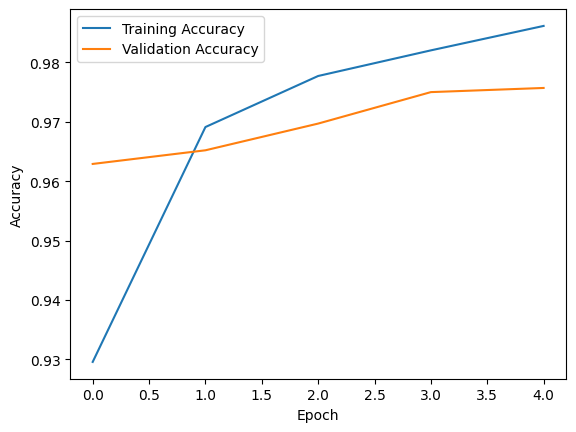

In [ ]:
# Evaluate the model on the test set and plot training/validation accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


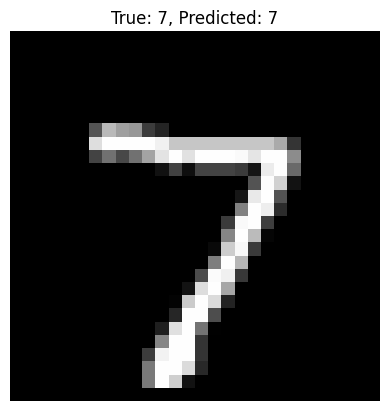

In [ ]:
# Make a prediction on a single test image and display the result

img = x_test[0]        # first image
label = y_test[0]      # true label

# Predict
prediction = model.predict(img.reshape(1, 784))  # reshape to (1, 784) for single image
predicted_label = np.argmax(prediction)          # index of highest probability

# Show results
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"True: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

### **1.5 Saving Model Predictions**

In [ ]:
# Save all predicted labels for the test set to a .npy file
import numpy as np
import os

# Make predictions on the whole test set
predictions = model.predict(x_test)

# Convert probabilities → labels (0–9)
predicted_labels = np.argmax(predictions, axis=1)

# Save into scripts folder
save_path = os.path.join("..", "scripts", "predicted_labels.npy")
np.save(save_path, predicted_labels)

print(f"Predictions saved at {save_path}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions saved at ..\scripts\predicted_labels.npy
